In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=10000, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train).score(X_test, y_test)



0.9445

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.9 MB/s eta 0:00:00


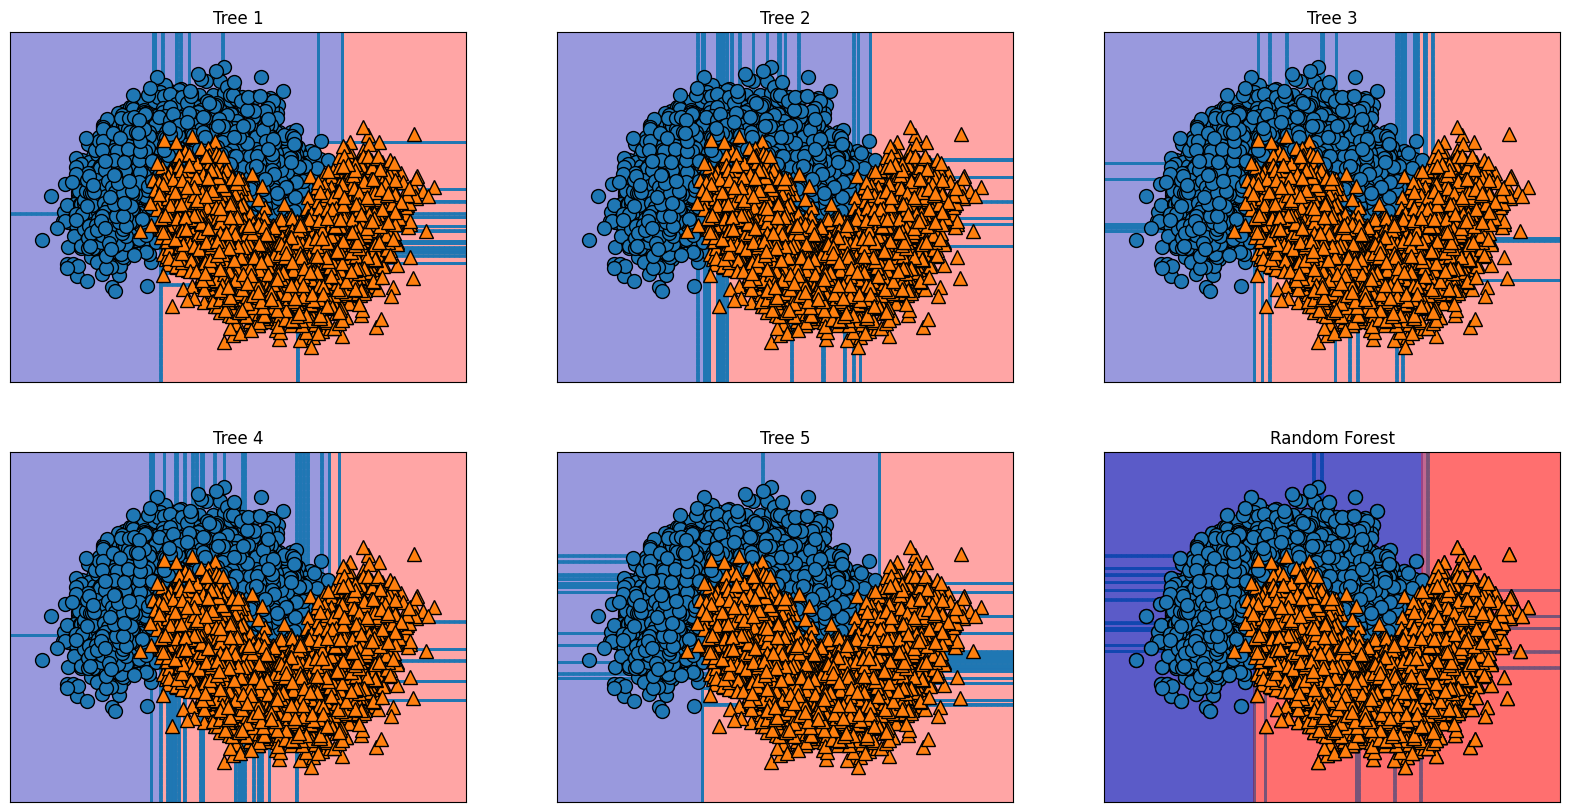

In [ ]:
import mglearn
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i+1}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [ ]:
#### another random forest for the breast cancer
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train).score(X_test, y_test), forest.score(X_train, y_train)



(0.9649122807017544, 1.0)

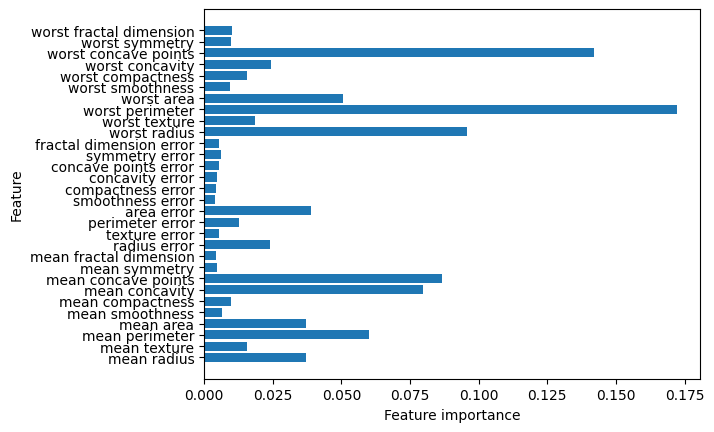

In [ ]:
## feature importance
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importances_cancer(forest)

In [ ]:
### gradian boosted regression tree (gradient boosting machines)
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test), gbrt.score(X_train, y_train)


(0.965034965034965, 1.0)

In [ ]:
pre_pruning = GradientBoostingClassifier(random_state=0, max_depth=1)
pre_pruning.fit(X_train, y_train)
pre_pruning.score(X_test, y_test), pre_pruning.score(X_train, y_train)

(0.972027972027972, 0.9906103286384976)

In [ ]:
pre_pruning.feature_importances_

array([0.00000000e+00, 9.07529959e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.32035766e-03, 2.65686907e-01,
       3.49588341e-04, 0.00000000e+00, 0.00000000e+00, 3.00083378e-04,
       0.00000000e+00, 1.45838255e-02, 1.05083243e-03, 0.00000000e+00,
       4.75469106e-03, 0.00000000e+00, 9.56890421e-04, 0.00000000e+00,
       9.23939383e-03, 1.61819935e-02, 3.22495788e-01, 9.24249926e-02,
       6.44041105e-03, 0.00000000e+00, 6.85101108e-03, 2.31450675e-01,
       6.41500790e-03, 3.42225071e-03])

In [ ]:
### learning rate

lr = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
lr.fit(X_train, y_train)
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.958041958041958, 0.9882629107981221)

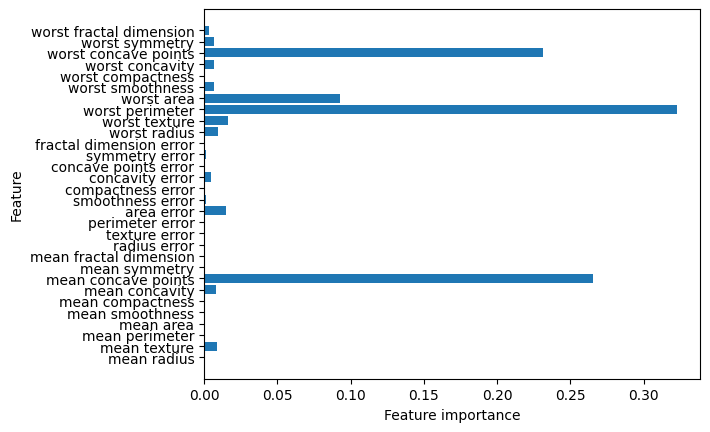

In [ ]:
plot_feature_importances_cancer(pre_pruning)